Progetto di Banfi Michele 869294

# Chiarimenti
- [ ] Rendimento cumulato
- [ ] Mean o Last quando si fa il groupby => sempre last
- [ ] Rendimenti da usare durante tutta la durata del progetto.. log?
- [ ] "Relazione tra i diversi titoli" => matrice di cov() tra essi??
- [ ] Correlazione dei rendimenti => autocorrelazione => sistemerá il file
- [ ] Fama-French => guardare lezioni

# 1) Sommario dei dati utilizzati

Financials:
1. **JPM** JPMorgan Chase & Co. 
2. **BAC** Bank Of America Corp

Healtcare:
1. **JNJ** Johnson & Johnson
2. **PFE** Pfizer Inc.

Energy
1. **CVX** Chevron Corporation
2. **XOM** Exxon Mobil Corporation

Importiamo le librerie necessarie

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Scarichiamo i dati dei titoli selezionati, compresi tra le seguenti date: 30.11.2012 – 30.11.2022.

In [19]:
start = "2012-11-30"
end = "2022-11-30"

#Financials
JPM = yf.download("JPM", start, end)
BAC = yf.download("BAC", start, end)

#Healtcare
JNJ = yf.download("JNJ", start, end)
PFE = yf.download("PFE", start, end)

#Energy
CVX = yf.download("CVX", start, end)
XOM = yf.download("XOM", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Per avere una priva vista dei dati utilizziamo il metodo `.describe()` che ci permette di avere una breve descrizione statistica

In [20]:
JPM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,93.851136,94.731037,92.970560,93.851482,83.820031,1.577044e+07
std,33.907864,34.250336,33.558312,33.885248,35.876948,6.844212e+06
min,40.689999,40.919998,40.200001,40.570000,30.739651,3.220500e+06
25%,60.970001,61.480000,60.450001,60.959999,49.403759,1.125030e+07
50%,93.820000,95.150002,92.650002,93.760002,84.171501,1.401420e+07
75%,115.279999,116.199997,114.320000,115.180000,105.218620,1.846510e+07
max,172.710007,172.960007,170.539993,171.779999,166.523987,6.088080e+07


In [21]:
BAC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,24.777978,25.041093,24.508677,24.774009,22.784345,7.728412e+07
std,9.483783,9.587238,9.374983,9.475852,9.737711,4.224534e+07
min,9.780000,9.870000,9.760000,9.800000,8.318864,1.380540e+07
25%,16.040001,16.190001,15.870000,16.040001,13.812623,4.917810e+07
50%,24.260000,24.580000,24.000000,24.240000,22.186407,6.618820e+07
75%,30.879999,31.150000,30.559999,30.879999,28.185312,9.298740e+07
max,49.910000,50.110001,49.029999,49.380001,48.256393,4.634910e+08


In [22]:
JNJ.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,127.199448,128.085554,126.287708,127.221148,113.268050,7.576588e+06
std,27.854863,28.124224,27.590340,27.853445,33.036382,3.150075e+06
min,69.239998,69.919998,69.180000,69.480003,52.922855,2.114900e+06
25%,102.120003,102.680000,101.500000,102.169998,82.829948,5.646300e+06
50%,128.860001,130.149994,127.650002,128.960007,114.352196,6.915300e+06
75%,146.990005,148.339996,145.869995,146.979996,137.433517,8.689400e+06
max,185.100006,186.690002,184.179993,186.009995,182.411407,5.814020e+07


In [23]:
PFE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,35.123943,35.442971,34.804061,35.127288,29.933336,2.899347e+07
std,6.936173,7.070667,6.810944,6.950114,8.943611,1.759352e+07
min,23.406073,23.795067,23.368120,23.614801,16.509911,5.187683e+06
25%,30.322580,30.588236,30.037951,30.332067,23.436914,1.977340e+07
50%,33.444023,33.709679,33.197342,33.490002,27.983570,2.511134e+07
75%,38.814041,39.180000,38.520000,38.823528,34.467247,3.285803e+07
max,60.599998,61.709999,59.830002,61.250000,59.323395,2.998294e+08


In [24]:
CVX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,113.345848,114.379770,112.277080,113.356412,92.178709,8.122344e+06
std,19.845245,19.974475,19.756069,19.895286,23.646302,4.311982e+06
min,55.259998,58.490002,51.599998,54.220001,47.611782,1.587800e+06
25%,102.379997,103.269997,101.519997,102.320000,78.191055,5.403600e+06
50%,114.370003,115.239998,113.209999,114.180000,85.810188,6.975500e+06
75%,121.870003,122.730003,120.910004,121.910004,100.092194,9.664600e+06
max,187.119995,189.679993,186.179993,188.050003,186.606522,5.723100e+07


In [25]:
XOM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,78.446643,79.117362,77.770274,78.459758,61.119599,1.648936e+07
std,16.317048,16.324204,16.333013,16.357000,12.477856,9.376462e+06
min,31.410000,32.380001,30.110001,31.450001,26.768915,3.851300e+06
25%,71.769997,72.300003,71.040001,71.750000,57.596508,1.019740e+07
50%,82.089996,82.580002,81.500000,82.050003,61.008522,1.355150e+07
75%,88.910004,89.559998,88.339996,88.970001,64.582886,1.962620e+07
max,113.879997,114.660004,113.059998,114.180000,114.180000,8.443940e+07


Uniamo i dati in un unico dataframe cosi da poter studiare al meglio l'andamento storico dei prezzi. Uniamo secondo l'`Adj Close` che é il prezzo di chiusura giornaliero aggiustato con i dividendi

In [26]:
market = pd.concat([JPM['Adj Close'], BAC['Adj Close'], JNJ['Adj Close'], PFE['Adj Close'], CVX['Adj Close'], XOM['Adj Close']], axis=1)
market.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']

In [27]:
market.head()

,JPM,BAC,JNJ,PFE,CVX,XOM
Date,,,,,,
2012-11-30,31.126066,8.369794,53.113262,16.596132,69.891808,57.710171
2012-12-03,30.921499,8.318864,53.052326,16.642569,69.210678,57.363140
2012-12-04,30.739651,8.412239,53.212296,16.695629,68.747765,57.088131
2012-12-05,31.216995,8.888081,53.296082,17.007393,69.547935,57.441711
2012-12-06,31.421568,8.888081,53.357014,16.987495,70.394386,57.618484


Ora possiamo procede con il plot dei dati

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

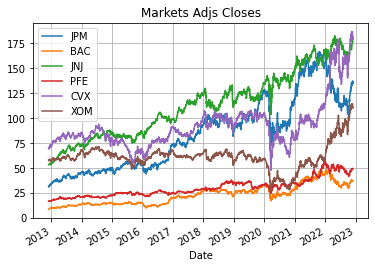

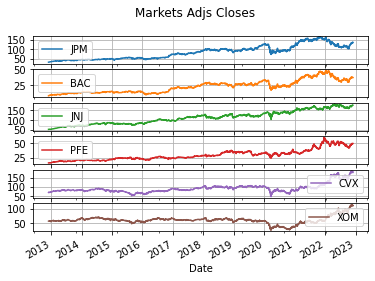

In [28]:
market.plot(grid=True, title="Markets Adjs Closes")
market.plot(grid=True, title="Markets Adjs Closes", subplots=True)

# 2) Statistiche descrittive

#### Rendimenti

Calcolo dei dati annui

In [29]:
JPMy = JPM.groupby(pd.Grouper(freq='Y')).mean()
BACy = BAC.groupby(pd.Grouper(freq='Y')).mean()
JNJy = JNJ.groupby(pd.Grouper(freq='Y')).mean()
PFEy = PFE.groupby(pd.Grouper(freq='Y')).mean()
CVXy = CVX.groupby(pd.Grouper(freq='Y')).mean()
XOMy = XOM.groupby(pd.Grouper(freq='Y')).mean()
marketY = pd.concat([JPMy['Adj Close'], BACy['Adj Close'], JNJy['Adj Close'], PFEy['Adj Close'], CVXy['Adj Close'], XOMy['Adj Close']], axis=1)
marketY.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']

In [30]:
marketY.head(14)

,JPM,BAC,JNJ,PFE,CVX,XOM
Date,,,,,,
2012-12-31,32.441211,9.205317,53.580445,16.786604,71.180376,57.564547
2013-12-31,39.999524,11.445543,66.341844,19.580293,80.816775,60.101686
2014-12-31,46.075222,13.960015,80.240114,21.159968,83.779962,66.384811
2015-12-31,51.920090,14.311631,81.609189,24.348035,69.561329,58.253507
2016-12-31,54.933521,13.513989,95.712283,24.559840,75.651887,62.840553
2017-12-31,78.939795,21.971163,112.254918,26.489143,87.832353,61.816626
2018-12-31,97.054241,26.814231,118.070121,31.600808,98.379410,62.773030
2019-12-31,102.727657,27.267753,123.043480,33.340949,101.807330,60.439993
2020-12-31,99.259953,24.857107,136.680898,32.000936,78.589112,38.625273


Rendimenti composti e cumulati annui

In [31]:
#Rendimento cumulato annuale
rcuJPMys = JPMy['Adj Close'].pct_change().shift(-1)
rcuJPMy = (1 + rcuJPMys).cumprod() - 1
rcuBACys = BACy['Adj Close'].pct_change().shift(-1)
rcuBACy = (1 + rcuBACys).cumprod() - 1
rcuJNJys = JNJy['Adj Close'].pct_change().shift(-1)
rcuJNJy = (1 + rcuJNJys).cumprod() - 1
rcuPFEys = PFEy['Adj Close'].pct_change().shift(-1)
rcuPFEy = (1 + rcuPFEys).cumprod() - 1
rcuCVXys = CVXy['Adj Close'].pct_change().shift(-1)
rcuCVXy = (1 + rcuCVXys).cumprod() - 1
rcuXOMys = XOMy['Adj Close'].pct_change().shift(-1)
rcuXOMy = (1 + rcuXOMys).cumprod() - 1
#Rendimento composto annuale
#+(100/80)^(1/3) - 1
rcoJPMy = np.prod(JPMy['Adj Close'] / JPMy['Adj Close'].shift(1))
rcoBACy = np.prod(BACy['Adj Close'] / BACy['Adj Close'].shift(1))
rcoJNJy = np.prod(JNJy['Adj Close'] / JNJy['Adj Close'].shift(1))
rcoPFEy = np.prod(PFEy['Adj Close'] / PFEy['Adj Close'].shift(1))
rcoCVXy = np.prod(CVXy['Adj Close'] / CVXy['Adj Close'].shift(1))
rcoXOMy = np.prod(XOMy['Adj Close'] / XOMy['Adj Close'].shift(1))

Rendimenti semplici e logaritmici

In [32]:
#Rendimento semplice
rsJPM = JPM['Adj Close'] / JPM['Adj Close'].shift(1)
rsBAC = BAC['Adj Close'] / BAC['Adj Close'].shift(1)
rsJNJ = JNJ['Adj Close'] / JNJ['Adj Close'].shift(1)
rsPFE = PFE['Adj Close'] / PFE['Adj Close'].shift(1)
rsCVX = CVX['Adj Close'] / CVX['Adj Close'].shift(1)
rsXOM = XOM['Adj Close'] / XOM['Adj Close'].shift(1)
rsJPM.dropna()
rsBAC.dropna()
rsJNJ.dropna()
rsPFE.dropna()
rsCVX.dropna()
rsXOM.dropna()
rsMarket = pd.concat([rsJPM, rsBAC, rsJNJ, rsPFE, rsCVX, rsXOM], axis=1)
rsMarket.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']
#Rendimento logaritmico
rlJPM = np.log(JPM['Adj Close'] / JPM['Adj Close'].shift(1))
rlBAC = np.log(BAC['Adj Close'] / BAC['Adj Close'].shift(1))
rlJNJ = np.log(JNJ['Adj Close'] / JNJ['Adj Close'].shift(1))
rlPFE = np.log(PFE['Adj Close'] / PFE['Adj Close'].shift(1))
rlCVX = np.log(CVX['Adj Close'] / CVX['Adj Close'].shift(1))
rlXOM = np.log(XOM['Adj Close'] / XOM['Adj Close'].shift(1))
rlJPM.dropna()
rlBAC.dropna()
rlJNJ.dropna()
rlPFE.dropna()
rlCVX.dropna()
rlXOM.dropna()
rlMarket = pd.concat([rlJPM, rlBAC, rlJNJ, rlPFE, rlCVX, rlXOM], axis=1)
rlMarket.columns = ['JPM', 'BAC', 'JNJ', 'PFE', 'CVX', 'XOM']


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

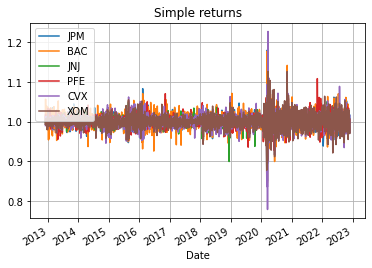

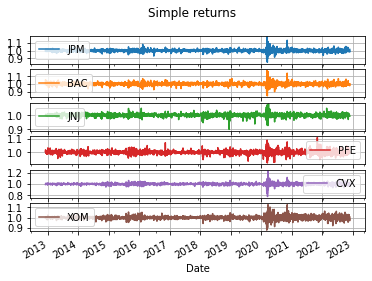

In [33]:
#Plot market simple returns
rsMarket.plot(grid=True, title="Simple returns")
rsMarket.plot(grid=True, title="Simple returns", subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

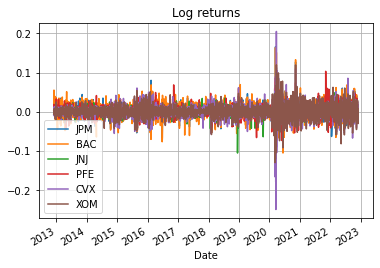

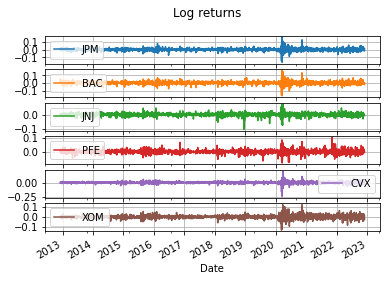

In [34]:
#Plot market Logarithmic returns
rlMarket.plot(grid=True, title="Log returns")
rlMarket.plot(grid=True, title="Log returns", subplots=True)

Ora plottiamo i rendimenti con istogrammi per vedere meglio che distribuzione hanno

<AxesSubplot:title={'center':'XOM Simple returns histogram'}, ylabel='Density'>

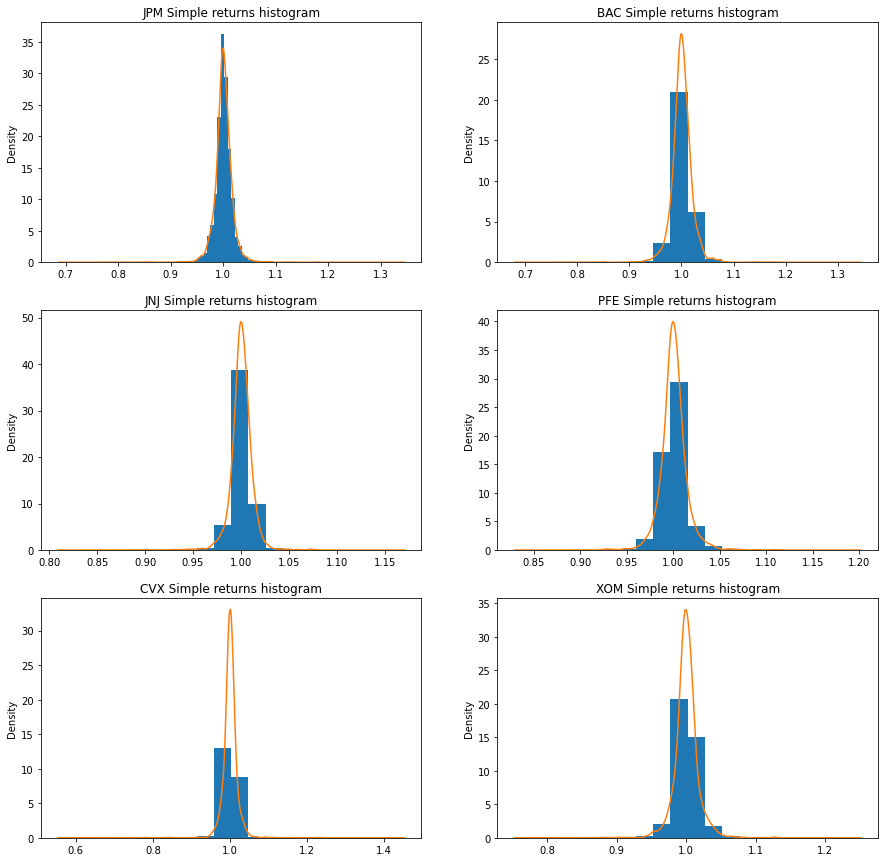

In [35]:
#Rendimenti semplici
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.hist(rsJPM, density=True, bins=50)
plt.title('JPM Simple returns histogram')
rsJPM.plot.density()
plt.subplot(322)
plt.hist(rsBAC, density=True)
plt.title('BAC Simple returns histogram')
rsBAC.plot.density()
plt.subplot(323)
plt.hist(rsJNJ, density=True)
plt.title('JNJ Simple returns histogram')
rsJNJ.plot.density()
plt.subplot(324)
plt.hist(rsPFE, density=True)
plt.title('PFE Simple returns histogram')
rsPFE.plot.density()
plt.subplot(325)
plt.hist(rsCVX, density=True)
plt.title('CVX Simple returns histogram')
rsCVX.plot.density()
plt.subplot(326)
plt.hist(rsXOM, density=True)
plt.title('XOM Simple returns histogram')
rsXOM.plot.density()

<AxesSubplot:title={'center':'XOM Logarithmic returns histogram'}, ylabel='Density'>

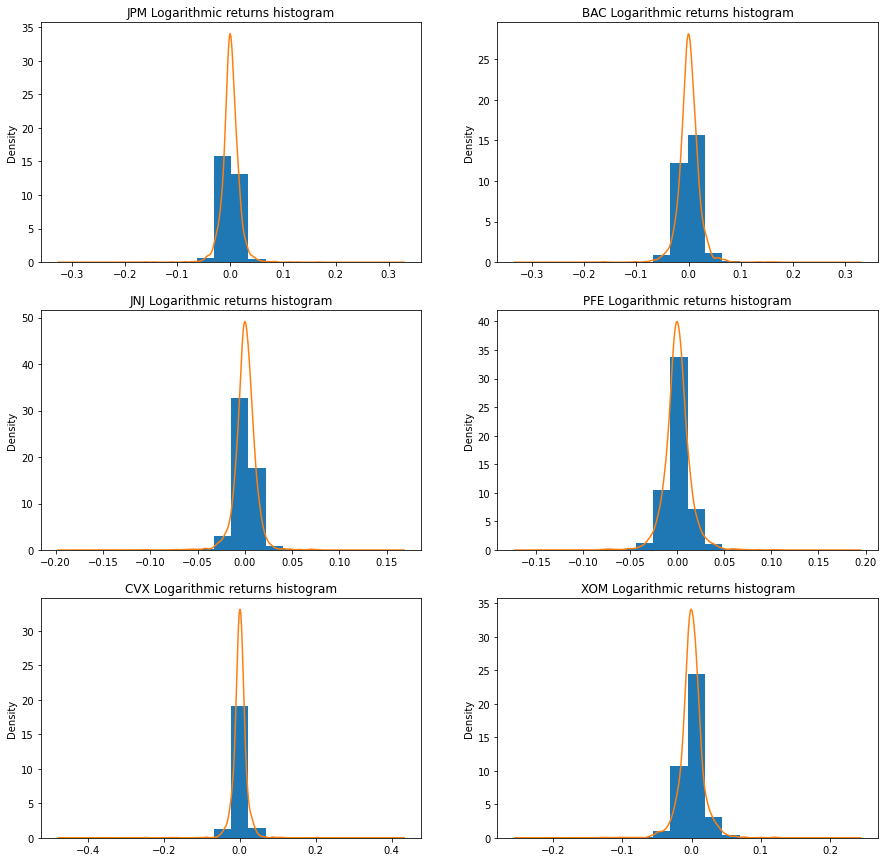

In [36]:
#Rendimenti logaritmici
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.hist(rlJPM, density=True)
plt.title('JPM Logarithmic returns histogram')
rlJPM.plot.density()
plt.subplot(322)
plt.hist(rlBAC, density=True)
plt.title('BAC Logarithmic returns histogram')
rlBAC.plot.density()
plt.subplot(323)
plt.hist(rlJNJ, density=True)
plt.title('JNJ Logarithmic returns histogram')
rlJNJ.plot.density()
plt.subplot(324)
plt.hist(rlPFE, density=True)
plt.title('PFE Logarithmic returns histogram')
rlPFE.plot.density()
plt.subplot(325)
plt.hist(rlCVX, density=True)
plt.title('CVX Logarithmic returns histogram')
rlCVX.plot.density()
plt.subplot(326)
plt.hist(rlXOM, density=True)
plt.title('XOM Logarithmic returns histogram')
rlXOM.plot.density()

In [37]:
import statsmodels.api as sm

Ora plottiamo per ogni rendimento di ogni azione:
- istogramma 
- boxplot 
- qq plot
- kernel density

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'JPM Log returns Kernel Density')

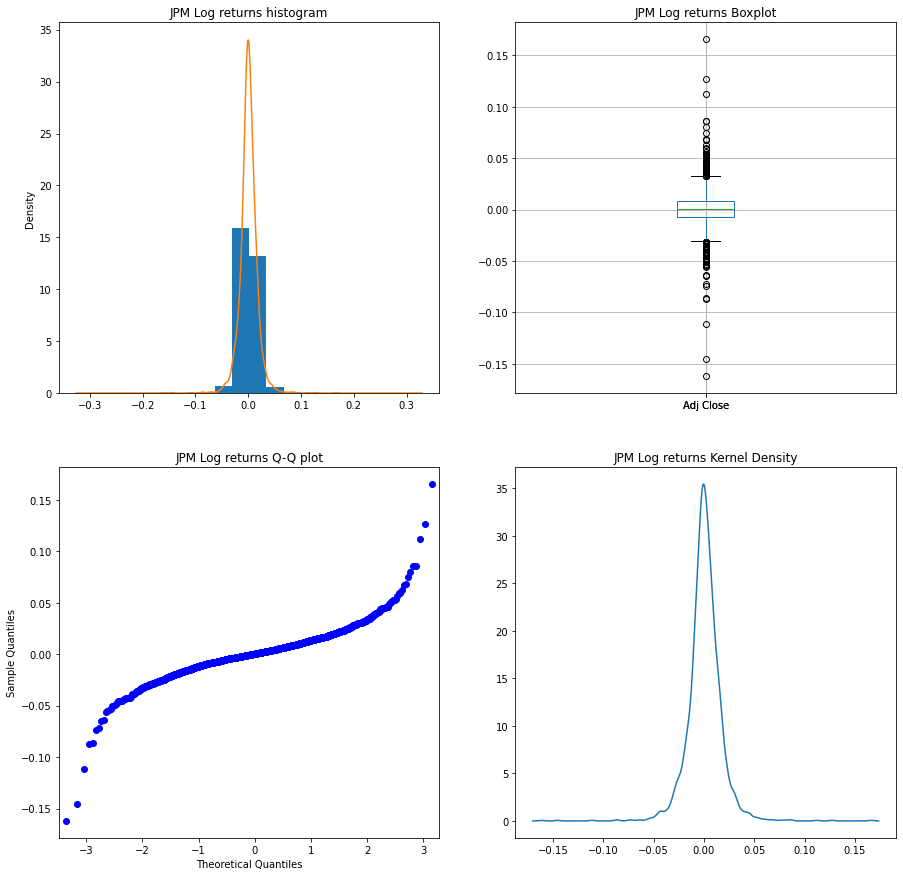

In [38]:
#JPM
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlJPM, density=True)
plt.title('JPM Log returns histogram')
rlJPM.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlJPM)
plt.title('JPM Log returns Boxplot')
rlJPM.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlJPM, line='s', ax=ax)
plt.title('JPM Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlJPM)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('JPM Log returns Kernel Density')


/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'BAC Log returns Kernel Density')

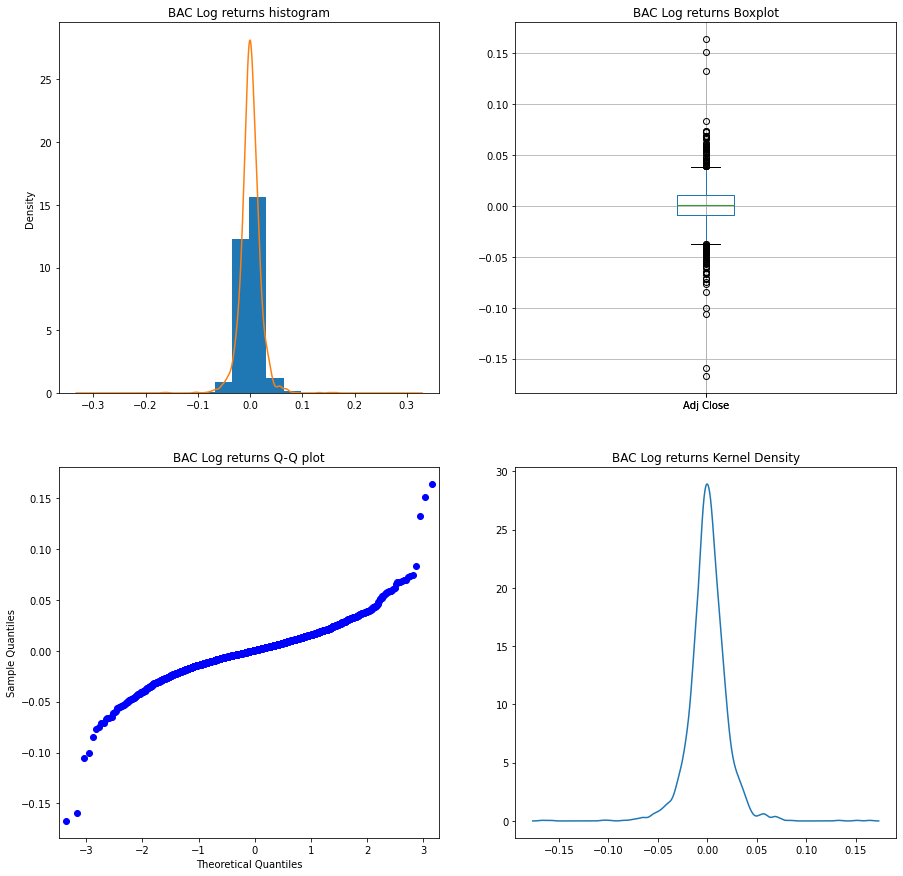

In [39]:
#BAC
fig = plt.figure(figsize=(15, 15))

ax=fig.add_subplot(221)
plt.hist(rlBAC, density=True)
plt.title('BAC Log returns histogram')
rlBAC.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlBAC)
plt.title('BAC Log returns Boxplot')
rlBAC.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlBAC, line='s', ax=ax)
plt.title('BAC Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlBAC)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('BAC Log returns Kernel Density')


/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'JNJ Log returns Kernel Density')

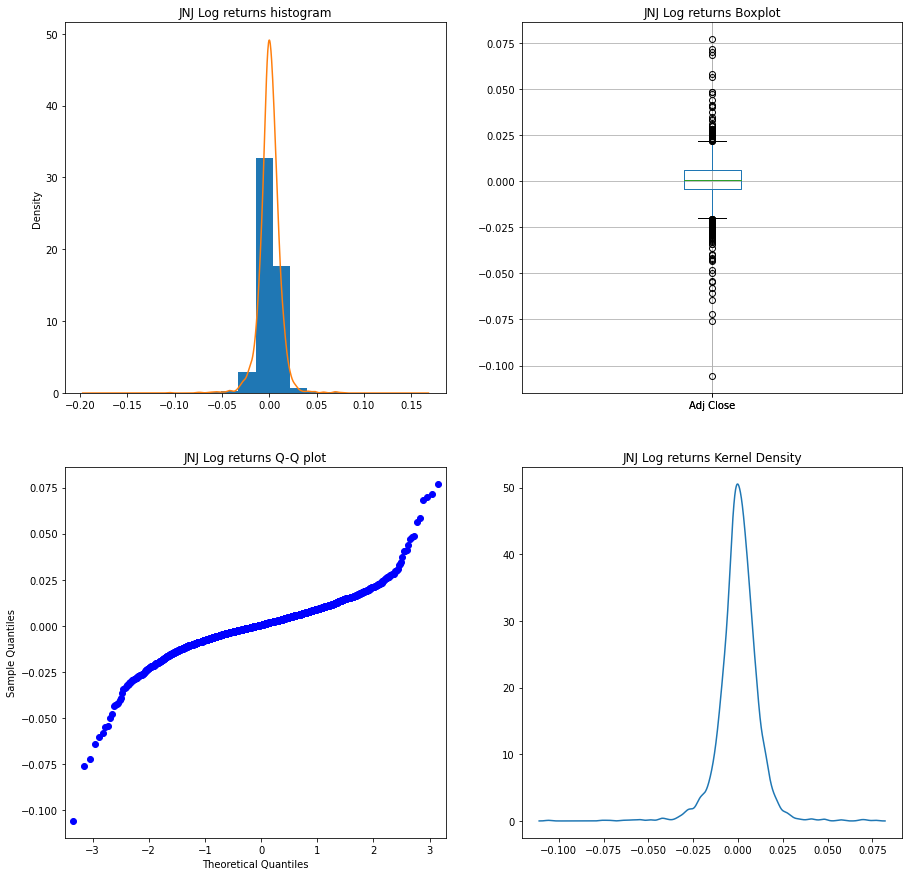

In [40]:
#JNJ
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlJNJ, density=True)
plt.title('JNJ Log returns histogram')
rlJNJ.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlJNJ)
plt.title('JNJ Log returns Boxplot')
rlJNJ.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlJNJ, line='s', ax=ax)
plt.title('JNJ Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlJNJ)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('JNJ Log returns Kernel Density')

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'PFE Log returns Kernel Density')

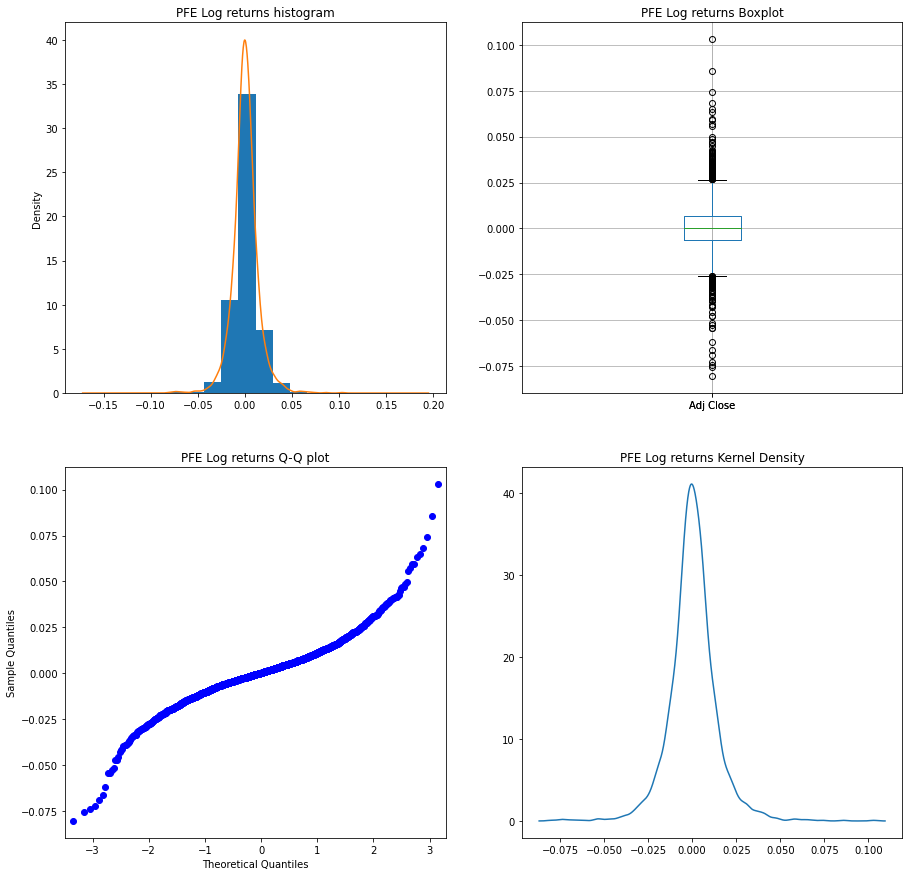

In [41]:
#PFE
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlPFE, density=True)
plt.title('PFE Log returns histogram')
rlPFE.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlPFE)
plt.title('PFE Log returns Boxplot')
rlPFE.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlPFE, line='s', ax=ax)
plt.title('PFE Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlPFE)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('PFE Log returns Kernel Density')

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'CVX Log returns Kernel Density')

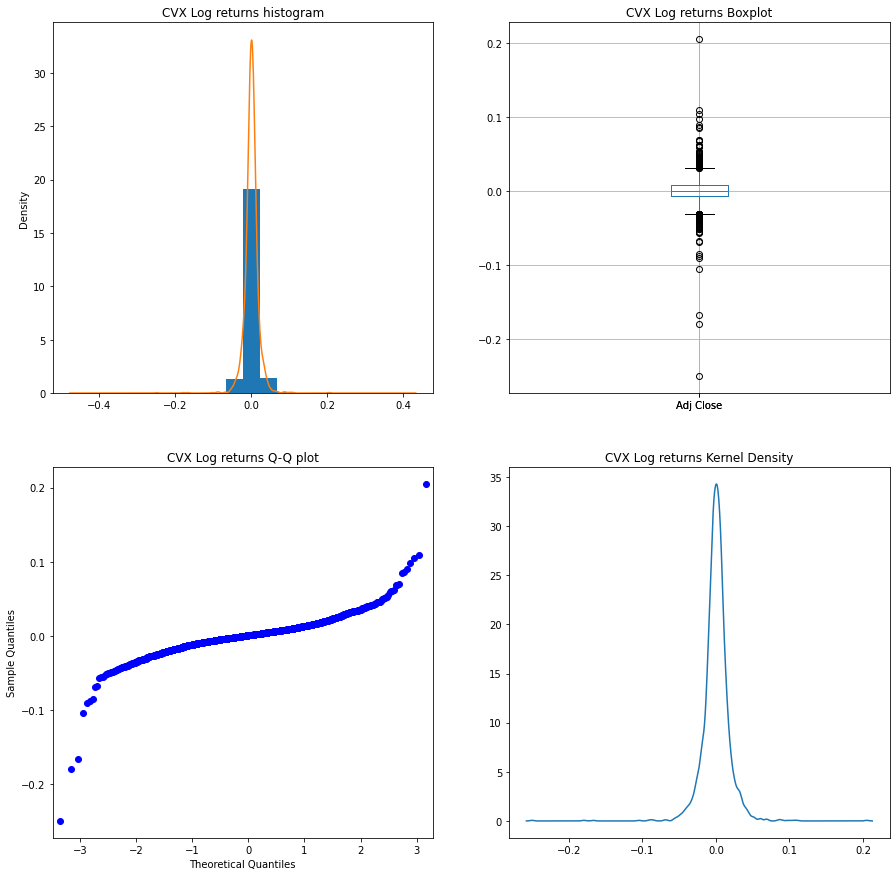

In [42]:
#CVX
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlCVX, density=True)
plt.title('CVX Log returns histogram')
rlCVX.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlCVX)
plt.title('CVX Log returns Boxplot')
rlCVX.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlCVX, line='s', ax=ax)
plt.title('CVX Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlCVX)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('CVX Log returns Kernel Density')

/Users/michelebanfi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'XOM Log returns Kernel Density')

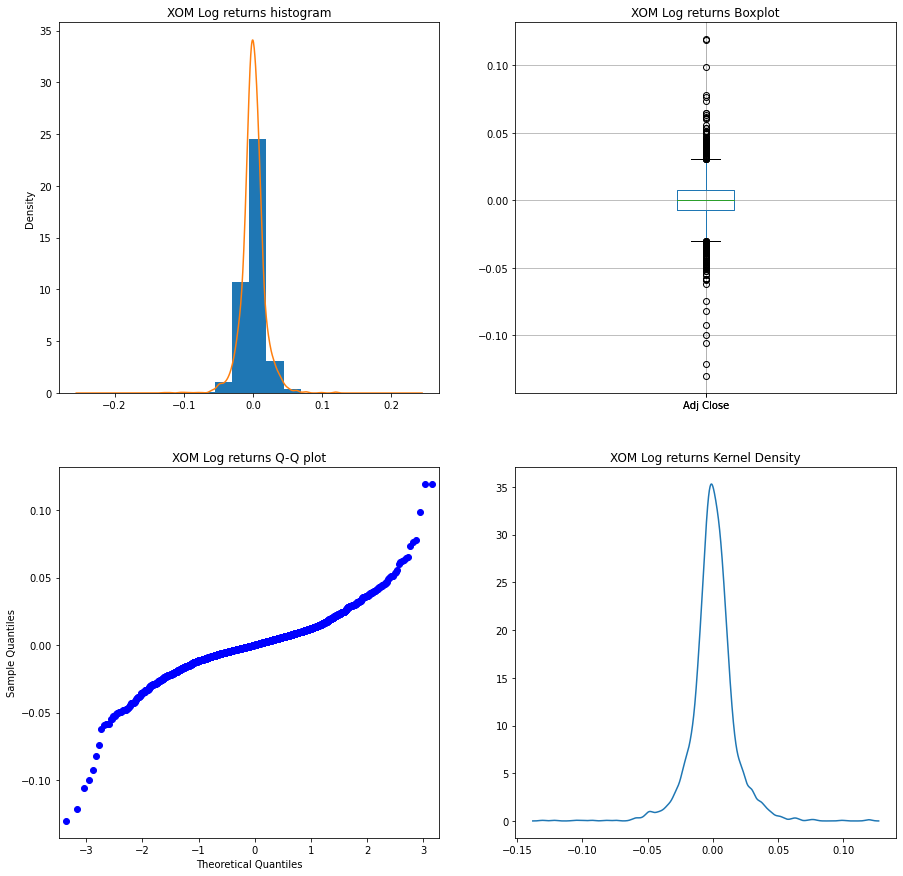

In [43]:
#XOM
fig = plt.figure(figsize=(15, 15))
ax=fig.add_subplot(221)
plt.hist(rlXOM, density=True)
plt.title('XOM Log returns histogram')
rlXOM.plot.density()

ax=fig.add_subplot(222)
plt.boxplot(rlXOM)
plt.title('XOM Log returns Boxplot')
rlXOM.to_frame().boxplot()

ax=fig.add_subplot(223)
sm.graphics.qqplot(rlXOM, line='s', ax=ax)
plt.title('XOM Log returns Q-Q plot')

kde = sm.nonparametric.KDEUnivariate(rlXOM)
kde.fit()
ax=fig.add_subplot(224)
ax.plot(kde.support, kde.density)
plt.title('XOM Log returns Kernel Density')

Ora procediamo con il calcolo delle statistiche descrittive:
- Media
- Varianza
- Deviazione standard
- Asimmetria
- Curtosi

In [44]:
#JPM
meanJPM = round(rlJPM.mean(), 4)
varJPM = round(rlJPM.var(), 4)
stdJPM = round(rlJPM.std(), 4)
skewJPM = round(rlJPM.skew(), 4)
kurtJPM = round(rlJPM.kurtosis(), 4)
print(meanJPM, varJPM, stdJPM, skewJPM, kurtJPM)

0.0006 0.0003 0.0169 -0.0678 13.807


In [45]:
#BAC
meanBAC = round(rlBAC.mean(), 4)
varBAC = round(rlBAC.var(), 4)
stdBAC = round(rlBAC.std(), 4)
skewBAC = round(rlBAC.skew(), 4)
kurtBAC = round(rlBAC.kurtosis(), 4)
print(meanBAC, varBAC, stdBAC, skewBAC, kurtBAC)

0.0006 0.0004 0.0194 -0.0652 9.9102


In [46]:
#JNJ
meanJNJ = round(rlJNJ.mean(), 4)
varJNJ = round(rlJNJ.var(), 4)
stdJNJ = round(rlJNJ.std(), 4)
skewJNJ = round(rlJNJ.skew(), 4)
kurtJNJ = round(rlJNJ.kurtosis(), 4)
print(meanJNJ, varJNJ, stdJNJ, skewJNJ, kurtJNJ)

0.0005 0.0001 0.0111 -0.4746 10.2492


In [47]:
#PFE
meanPFE = round(rlPFE.mean(), 4)
varPFE = round(rlPFE.var(), 4)
stdPFE = round(rlPFE.std(), 4)
skewPFE = round(rlPFE.skew(), 4)
kurtPFE = round(rlPFE.kurtosis(), 4)
print(meanPFE, varPFE, stdPFE, skewPFE, kurtPFE)

0.0004 0.0002 0.0138 0.1679 5.6774


In [48]:
#CVX
meanCVX = round(rlCVX.mean(), 4)
varCVX = round(rlCVX.var(), 4)
stdCVX = round(rlCVX.std(), 4)
skewCVX = round(rlCVX.skew(), 4)
kurtCVX = round(rlCVX.kurtosis(), 4)
print(meanCVX, varCVX, stdCVX, skewCVX, kurtCVX)

0.0004 0.0003 0.0183 -1.0027 29.3853


In [49]:
#XOM
meanXOM = round(rlXOM.mean(), 4)
varXOM = round(rlXOM.var(), 4)
stdXOM = round(rlXOM.std(), 4)
skewXOM = round(rlXOM.skew(), 4)
kurtXOM = round(rlXOM.kurtosis(), 4)
print(meanXOM, varXOM, stdXOM, skewXOM, kurtXOM)

0.0003 0.0003 0.0168 -0.1723 7.8798


Ora procediamo al calcolo della matrice di varianza/covarianza dei rendimenti tra i diversi titoli

In [50]:
#JPM Vs BAC
x = pd.concat([rlJPM, rlBAC], axis=1)
x.columns = ['JPM', 'BAC']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

0.0002928237462525007
          JPM       BAC
JPM  0.000285  0.000293
BAC  0.000293  0.000376


In [51]:
#JPM Vs PFE
x = pd.concat([rlJPM, rlPFE], axis=1)
x.columns = ['JPM', 'PFE']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

9.586142428397066e-05
          JPM       PFE
JPM  0.000285  0.000096
PFE  0.000096  0.000190


In [52]:
#JPM Vs CVX
x = pd.concat([rlJPM, rlCVX], axis=1)
x.columns = ['JPM', 'CVX']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

0.00018852954865773765
          JPM       CVX
JPM  0.000285  0.000189
CVX  0.000189  0.000334


In [53]:
#BAC Vs JNJ
x = pd.concat([rlBAC, rlJNJ], axis=1)
x.columns = ['BAC', 'JNJ']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

8.258061902768226e-05
          BAC       JNJ
BAC  0.000376  0.000083
JNJ  0.000083  0.000124


In [54]:
#BAC Vs XOM
x = pd.concat([rlBAC, rlXOM], axis=1)
x.columns = ['BAC', 'XOM']
x.dropna()
xcovariance = x.cov().iloc[0,1]
print(xcovariance)
print(x.cov())

0.0001831375788921026
          BAC       XOM
BAC  0.000376  0.000183
XOM  0.000183  0.000283


Passiamo a esaminare la correlazione tra i diversi rendimenti

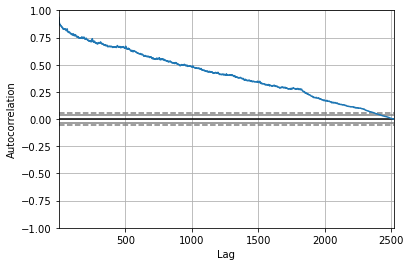

In [55]:
pd.plotting.autocorrelation_plot(JPM)
#plt.ylim(-0.25, 0.25)
plt.show()


# 3) Analisi di previsione

In [56]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

In [57]:
def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))
    lowest_aic, pdq, pdqs = None, None, None
    total_iterations = 0
    for order in param_combinations:
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(dataframe, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
                model_result = model.fit(maxiter=200, disp=False)
                
                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order
            
            except Exception as ex:
                continue
                
    return lowest_aic, pdq, pdqs

In [58]:
dfJPM = JPM['Adj Close'].resample('M').last()
lowest_aic, order, seasonal_order = arima_grid_search(dfJPM, 12)
print('ARIMA {}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

ARIMA (0, 1, 1)x(0, 1, 1, 12)
Lowest AIC: 654.556


In [59]:
model = SARIMAX(dfJPM, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
model_results = model.fit(maxiter=200, disp=False)
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -324.278
Date:                            Thu, 22 Dec 2022   AIC                            654.556
Time:                                    15:42:29   BIC                            662.185
Sample:                                11-30-2012   HQIC                           657.637
                                     - 11-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0063      0.086     -0.074      0.941      -0.174       0.162
ma.S.L12      -1.0000   1380.840   

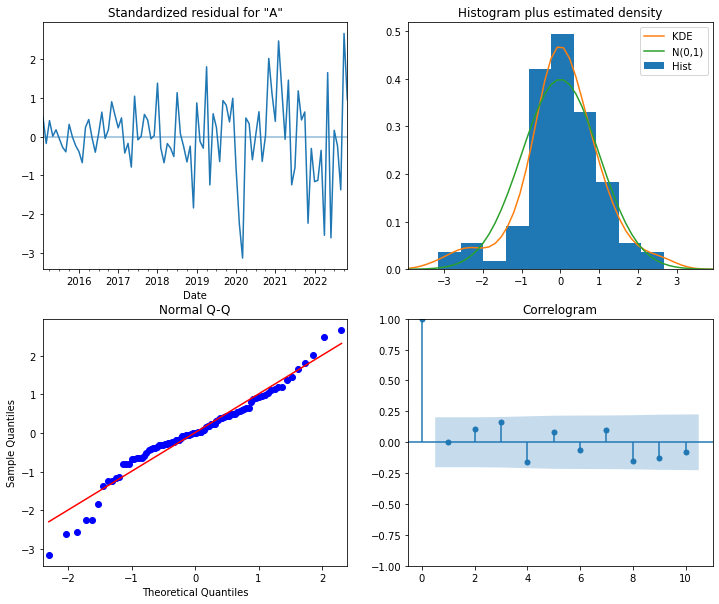

In [60]:
model_results.plot_diagnostics(figsize=(12,10));

            lower Adj Close  upper Adj Close
2017-12-31        77.192773       107.411042
2018-01-31        75.326729       104.934536
2018-02-28        87.828460       117.436244
2018-03-31        85.930811       115.538595
2018-04-30        81.629745       111.237528


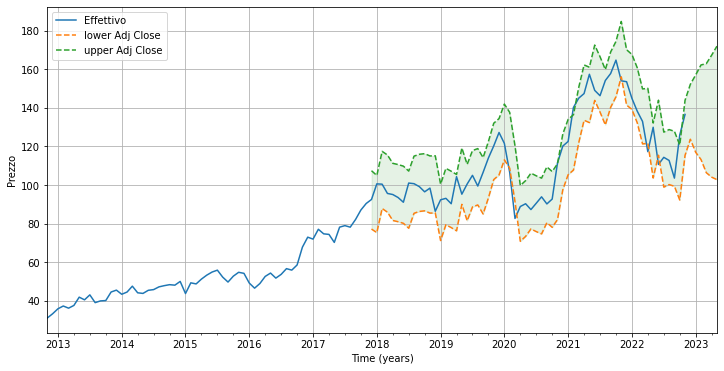

In [61]:
n = len(dfJPM.index)
prediction = model_results.get_prediction(start=n-12*5, end = n+5)
prediction_ci = prediction.conf_int()
print(prediction_ci.head())
plt.figure(figsize=(12,6))
ax = dfJPM['2010':].plot(label = 'Effettivo')
prediction_ci.plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:,0]
upper_ci = prediction_ci.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

# CAPM

Calcoliamo il beta di ciascun titolo rispetto al mercato

In [62]:
import statsmodels.formula.api as smf

In [63]:
aJPM = 'JPM'
aBAC = 'BAC'
aJNJ = 'JNJ'
aPFE = 'PFE'
aCVX = 'CVX'
aXOM = 'XOM'
marketBenchmark = '^GSPC'
df = yf.download([aJPM, aBAC, aJNJ, aPFE, aCVX, aXOM, marketBenchmark], start, end)

[*********************100%***********************]  7 of 7 completed


In [64]:
marketCloses = df['Adj Close']
x = marketCloses.pct_change().dropna()
x.head()

,BAC,CVX,JNJ,JPM,PFE,XOM,^GSPC
Date,,,,,,,
2012-12-03,-0.006085,-0.009746,-0.001147,-0.006572,0.002798,-0.006013,-0.004745
2012-12-04,0.011224,-0.006689,0.003015,-0.005881,0.003188,-0.004794,-0.001710
2012-12-05,0.056566,0.011639,0.001575,0.015529,0.018673,0.006193,0.001585
2012-12-06,0.000000,0.012171,0.001143,0.006554,-0.001170,0.003077,0.003307
2012-12-07,0.017209,0.005073,0.005710,0.026284,-0.001952,0.006818,0.002921


In [65]:
#JPM and S&P500 Beta
JPMMarket = pd.concat([x['JPM'], x['^GSPC']], axis=1)
covJPM = JPMMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaJPM = covJPM/marketVariance
betaJPM

1.1483518522096592

In [66]:
#BAC and S&P500 Beta
BACMarket = pd.concat([x['BAC'], x['^GSPC']], axis=1)
covBAC = BACMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaBAC = covBAC/marketVariance
betaBAC

1.2645882999633138

In [67]:
#JNJ and S&P500 Beta
JNJMarket = pd.concat([x['JNJ'], x['^GSPC']], axis=1)
covJNJ = JNJMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaJNJ = covJNJ/marketVariance
betaJNJ

0.6074964649534093

In [68]:
#PFE and S&P500 Beta
PFEMarket = pd.concat([x['PFE'], x['^GSPC']], axis=1)
covPFE = PFEMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaPFE = covPFE/marketVariance
betaPFE

0.6627507753445012

In [69]:
#CVX and S&P500 Beta
CVXMarket = pd.concat([x['CVX'], x['^GSPC']], axis=1)
covCVX = CVXMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaCVX = covCVX/marketVariance
betaCVX

1.0452641443544937

In [70]:
#XOM and S&P500 Beta
XOMMarket = pd.concat([x['XOM'], x['^GSPC']], axis=1)
covXOM = XOMMarket.cov().iloc[0,1]
marketVariance = x['^GSPC'].var()
betaXOM = covXOM/marketVariance
betaXOM

0.9113927964703223

Ora procediamo con il calcolo del Fama French factor

In [71]:
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)
factor_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [72]:
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

In [73]:
factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']

In [74]:
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")

In [75]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start:end]

In [76]:
factor_df.head()

,mkt,smb,hml,rf
data,,,,
2012-12,1.18,1.50,3.51,0.01
2013-01,5.57,0.33,0.96,0.00
2013-02,1.29,-0.28,0.11,0.00
2013-03,4.03,0.81,-0.19,0.00
2013-04,1.55,-2.36,0.45,0.00


In [77]:
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)

In [78]:
#JPM Fama French risk exposure
y = JPM['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     99.54
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.97e-32
Time:                        15:42:31   Log-Likelihood:                 225.68
No. Observations:                 119   AIC:                            -443.4
Df Residuals:                     115   BIC:                            -432.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.003      0.742      0.4

In [79]:
#BAC Fama French risk exposure
y = BAC['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     78.32
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.15e-27
Time:                        15:42:31   Log-Likelihood:                 192.56
No. Observations:                 119   AIC:                            -377.1
Df Residuals:                     115   BIC:                            -366.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0022      0.005      0.478      0.6

In [80]:
#JNJ Fama French risk exposure
y = JNJ['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     23.00
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           9.78e-12
Time:                        15:42:31   Log-Likelihood:                 230.17
No. Observations:                 119   AIC:                            -452.3
Df Residuals:                     115   BIC:                            -441.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.003      1.112      0.2

In [81]:
#PFE Fama French risk exposure
y = PFE['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     13.99
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.74e-08
Time:                        15:42:31   Log-Likelihood:                 180.58
No. Observations:                 119   AIC:                            -353.2
Df Residuals:                     115   BIC:                            -342.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.005      0.382      0.7

In [82]:
#CVX Fama French risk exposure
y = CVX['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     64.61
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.47e-24
Time:                        15:42:31   Log-Likelihood:                 194.24
No. Observations:                 119   AIC:                            -380.5
Df Residuals:                     115   BIC:                            -369.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0009      0.005     -0.197      0.8

In [83]:
#XOM Fama French risk exposure
y = XOM['Adj Close'].resample('M').last().pct_change().dropna()
y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf
ff_model = smf.ols(formula = 'excess_rtn ~ mkt + smb + hml', data = ff_data).fit()
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     58.21
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           5.76e-23
Time:                        15:42:31   Log-Likelihood:                 191.29
No. Observations:                 119   AIC:                            -374.6
Df Residuals:                     115   BIC:                            -363.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0018      0.005     -0.384      0.7